<div align="center"><h1>Heart Attack Risk Prediction</h1></div>

# About

This project aims to predict the likelihood of a heart attack using a data set that includes various health and lifestyle factors. The prediction is based on the identification of key features that contribute significantly to the assessment of heart attack risk.

## Features

The dataset includes the following features:

- **Patient ID:** Unique identifier for each patient
- **Age:** Age of the patient
- **Sex:** Gender of the patient (Male/Female)
- **Cholesterol:** Cholesterol levels of the patient
- **Blood Pressure:** Blood pressure of the patient (systolic/diastolic)
- **Heart Rate:** Heart rate of the patient
- **Diabetes:** Whether the patient has diabetes (Yes/No)
- **Family History:** Family history of heart-related problems (1: Yes, 0: No)
- **Smoking:** Smoking status of the patient (1: Smoker, 0: Non-smoker)
- **Obesity:** Obesity status of the patient (1: Obese, 0: Not obese)
- **Alcohol Consumption:** Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
- **Exercise Hours Per Week:** Number of exercise hours per week
- **Diet:** Dietary habits of the patient (Healthy/Average/Unhealthy)
- **Previous Heart Problems:** Previous heart problems of the patient (1: Yes, 0: No)
- **Medication Use:** Medication usage by the patient (1: Yes, 0: No)
- **Stress Level:** Stress level reported by the patient (1-10)
- **Sedentary Hours Per Day:** Hours of sedentary activity per day
- **Income:** Income level of the patient
- **BMI:** Body Mass Index (BMI) of the patient
- **Triglycerides:** Triglyceride levels of the patient
- **Physical Activity Days Per Week:** Days of physical activity per week
- **Sleep Hours Per Day:** Hours of sleep per day
- **Country:** Country of the patient
- **Continent:** Continent where the patient resides
- **Hemisphere:** Hemisphere where the patient resides
- **Heart Attack Risk (Outcome):** Presence of heart attack risk (1: Yes, 0: No)

## Methodology

The predictive model will focus on selecting the most informative features from the dataset to improve the accuracy of heart attack risk predictions. By analyzing and prioritizing key factors, the model aims to provide valuable information to identify individuals at higher risk of having a heart attack.

## Data Cleaning

Before we start with generating our models, first we should clean the dataset, and eliminate the unnecessary features.

In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')


file_path = "heart_attack_prediction_dataset.csv"

df = pd.read_csv(file_path)

df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### Check the shape and columns, drop the duplicates

In [584]:
df.shape

(8763, 26)

In [585]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

Drop the Duplicate values if any

In [586]:
df.drop_duplicates(inplace=True)
df.shape

(8763, 26)

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [588]:
columns_to_drop = ['Hemisphere', 'Patient ID', 'Income', 'Country', 'Continent']

df.drop(columns_to_drop, axis=1, inplace=True)

df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0


1- Lets start organizing the age column

In [589]:
df['Age'].unique()

array([67, 21, 84, 66, 54, 90, 20, 43, 73, 71, 77, 60, 88, 69, 38, 50, 45,
       36, 48, 40, 79, 63, 27, 25, 86, 42, 52, 29, 30, 47, 44, 33, 51, 70,
       85, 31, 56, 24, 74, 72, 55, 26, 53, 46, 57, 22, 35, 39, 80, 65, 83,
       82, 28, 19, 75, 18, 34, 37, 89, 32, 49, 23, 59, 62, 64, 61, 76, 41,
       87, 81, 58, 78, 68], dtype=int64)

In [590]:
df['Age'].isnull().sum()

0

Above we can see that all data of 'Age' column is clear, no null, and all of them are in the type of integer

In [591]:
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0


2- Organizing the 'Sex' column

In [592]:
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

With the help of the One-hot-encoding, 'Sex' column is converted to is_male column

'Sex' --> 'is_male' (if male: 1, otherwise: 0)

In [593]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.rename(columns={'Sex_Male': 'is_male'},inplace=True)

# Drop first drops the original 'Sex' column. Now it is True if patient is Male otherwise it is False.

df['is_male'] = df['is_male'].astype(int)

# changing type to integer True -> 1 , False -> 0 so it won't be any problem when we use this column in model.

df.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,is_male
0,67,208,158/88,72,0,0,1,0,0,4.168189,...,0,0,9,6.615001,31.251233,286,0,6,0,1
1,21,389,165/93,98,1,1,1,1,1,1.813242,...,1,0,1,4.963459,27.194973,235,1,7,0,1
2,21,324,174/99,72,1,0,0,0,0,2.078353,...,1,1,9,9.463426,28.176571,587,4,4,0,0
3,84,383,163/100,73,1,1,1,0,1,9.828130,...,1,0,9,7.648981,36.464704,378,3,4,0,1
4,66,318,91/88,93,1,1,1,1,0,5.804299,...,1,0,6,1.514821,21.809144,231,1,5,0,1


3- Orginizing the Cholesterol Column

In [594]:
df['Cholesterol'].unique()

array([208, 389, 324, 383, 318, 297, 358, 220, 145, 248, 373, 374, 228,
       259, 122, 379, 166, 303, 340, 294, 359, 202, 133, 159, 271, 273,
       328, 154, 135, 197, 321, 375, 360, 263, 201, 347, 129, 229, 251,
       121, 190, 185, 279, 336, 192, 180, 203, 368, 222, 243, 218, 120,
       285, 377, 369, 311, 139, 266, 153, 339, 329, 333, 398, 124, 183,
       163, 362, 390, 200, 396, 255, 209, 247, 250, 227, 246, 223, 330,
       195, 194, 178, 155, 240, 237, 216, 276, 224, 326, 198, 301, 314,
       304, 334, 213, 254, 230, 316, 277, 388, 206, 384, 205, 261, 308,
       338, 382, 291, 168, 171, 378, 253, 245, 226, 281, 123, 173, 231,
       234, 268, 306, 186, 293, 161, 380, 239, 149, 320, 219, 335, 265,
       126, 307, 270, 225, 193, 148, 296, 136, 364, 353, 252, 232, 387,
       299, 357, 214, 370, 345, 351, 344, 152, 150, 131, 272, 302, 337,
       170, 356, 274, 188, 125, 138, 376, 181, 184, 275, 394, 128, 217,
       399, 283, 289, 284, 327, 262, 212, 350, 385, 162, 141, 36

In [595]:
df['Cholesterol'].isnull().sum()

0

Looks like 'Cholesterol' column is already organized, and we don't need to change anything

4- Blood Pressure

In [596]:
df['Blood Pressure'].unique()

array(['158/88', '165/93', '174/99', ..., '137/94', '94/76', '119/67'],
      dtype=object)

In [597]:
df['Blood Pressure'].isnull().sum()

0

We can see that there are not any NULL values for the Blood Pressure. However, it is in number/number format which we cannot use in our modelling.
We can separate the columns. Originally: (systolic/diastolic) , now I will create separately two columns systolic_pressure and diastolic_pressure

In [598]:
def handle_blood_pressure_systolic(value):
    value = str(value)
    value = value.split('/')
    return int(value[0])

def handle_blood_pressure_diastolic(value):
    value = str(value)
    value = value.split('/')
    return int(value[1])


df['systolic_pressure'] = df['Blood Pressure'].apply(handle_blood_pressure_systolic)
df['diastolic_pressure'] = df['Blood Pressure'].apply(handle_blood_pressure_diastolic)

df.drop(columns='Blood Pressure', axis=1, inplace=True)

df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,9,6.615001,31.251233,286,0,6,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,1,4.963459,27.194973,235,1,7,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,9,9.463426,28.176571,587,4,4,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,9,7.648981,36.464704,378,3,4,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,6,1.514821,21.809144,231,1,5,0,1,91,88


So far we have completed:
* Age
* Sex
* Cholesterol
* Blood Pressure

5- Organizing the Heart Rate Column

In [599]:
df['Heart Rate'].unique()

array([ 72,  98,  73,  93,  48,  84, 107,  68,  55,  97,  70,  85, 102,
        40,  56, 104,  71,  69,  66,  81,  52, 105,  96,  74,  49,  45,
        50,  46,  44, 106,  83,  86,  65, 101,  51,  43,  79,  90,  94,
        78,  92,  54, 109,  61,  64,  82, 110,  42,  63,  41, 100,  76,
        75,  58,  53,  60,  77,  47,  59,  57,  87,  67,  88,  99,  80,
        95, 108,  89,  62, 103,  91], dtype=int64)

In [600]:
df['Heart Rate'].isnull().sum()

0

In [601]:
df['Heart Rate'].isna().sum()

0

Looks like Heart Rate is already organized and cleaned. All values are in integer format, and the column does not contain any NaN value

In [602]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,9,6.615001,31.251233,286,0,6,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,1,4.963459,27.194973,235,1,7,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,9,9.463426,28.176571,587,4,4,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,9,7.648981,36.464704,378,3,4,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,6,1.514821,21.809144,231,1,5,0,1,91,88


6- Organizing the 'Diabetes' Feature

In [603]:
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [604]:
df['Diabetes'].isnull().sum()

0

In [605]:
df['Diabetes'].isna().sum()

0

Diabetes column is already organized.

In [606]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,9,6.615001,31.251233,286,0,6,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,1,4.963459,27.194973,235,1,7,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,9,9.463426,28.176571,587,4,4,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,9,7.648981,36.464704,378,3,4,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,6,1.514821,21.809144,231,1,5,0,1,91,88


7- Family History

In [607]:
df['Family History'].unique()

array([0, 1], dtype=int64)

In [608]:
df['Family History'].isnull().sum()

0

In [609]:
df['Family History'].isna().sum()

0

Family history is already a clean feature

8- Smoking

In [610]:
df['Smoking'].unique()

array([1, 0], dtype=int64)

In [611]:
df['Smoking'].isnull().sum()

0

In [612]:
df['Smoking'].isna().sum()

0

Smoking is already a clean feature

9- Obesity 

In [613]:
df['Obesity'].unique()

array([0, 1], dtype=int64)

In [614]:
df['Obesity'].isnull().sum()

0

In [615]:
df['Obesity'].isna().sum()

0

Obesity is already a clean feature

10- Alcohol Consumption

In [616]:
df['Alcohol Consumption'].unique()

array([0, 1], dtype=int64)

In [617]:
df['Alcohol Consumption'].isnull().sum()

0

In [618]:
df['Alcohol Consumption'].isna().sum()

0

Alcohol consumption is already a clean feature, no null values are found and in integer type.

In [619]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,9,6.615001,31.251233,286,0,6,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,1,4.963459,27.194973,235,1,7,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,9,9.463426,28.176571,587,4,4,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,9,7.648981,36.464704,378,3,4,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,6,1.514821,21.809144,231,1,5,0,1,91,88


11- Exercise Hours Per Week

In [620]:
df['Exercise Hours Per Week'].unique()

array([ 4.16818884,  1.81324162,  2.07835299, ...,  3.14843791,
        3.78994983, 18.08174797])

In [621]:
df['Exercise Hours Per Week'].isnull().sum()

0

In [622]:
df['Exercise Hours Per Week'].isna().sum()

0

Exercise Hours Per Week column is also clean

12- Diet Column

In [623]:
df['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

With the changes below, now Unhealthy is represented as 0, Average is represented as 1 and Healthy is represented as 2

In [624]:
def handle_diet(value):
    value = str(value)

    if value == 'Unhealthy':
        return 0
    elif value == 'Average':
        return 1
    elif value == 'Healthy':
        return 2
    else:
        return np.nan
    


df['Diet'] = df['Diet'].apply(handle_diet)
df['Diet']


0       1
1       0
2       2
3       1
4       0
       ..
8758    2
8759    2
8760    1
8761    0
8762    2
Name: Diet, Length: 8763, dtype: int64

The type of the Diet is now integer instead of Object.

In [625]:
df['Diet'].unique()

array([1, 0, 2], dtype=int64)

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   int64  
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

13- Previous Heart Problems

In [627]:
df['Previous Heart Problems'].unique()

array([0, 1], dtype=int64)

In [628]:
df['Previous Heart Problems'].isnull().sum()

0

In [629]:
df['Previous Heart Problems'].isna().sum()

0

Previous heart problems column is already cleaned, no null values and all values are in integer format 

14- Medication Use

In [630]:
df['Medication Use'].unique()

array([0, 1], dtype=int64)

In [631]:
df['Medication Use'].isnull().sum()

0

In [632]:
df['Medication Use'].isna().sum()

0

Medication Use column is already cleaned, no null values and all values are in integer format

15- Stress Level

In [633]:
df['Stress Level'].unique()

array([ 9,  1,  6,  2,  7,  4,  5,  8, 10,  3], dtype=int64)

In [634]:
df['Stress Level'].isnull().sum()

0

Stress Level Column is already cleaned, no null values and all values are in integer format.

16- Sedentary Hours Per Day (Hours that are spent without moving)

In [635]:
df['Sedentary Hours Per Day'].unique()

array([6.61500145, 4.96345884, 9.46342584, ..., 2.37521373, 0.02910426,
       9.00523438])

In [636]:
df['Sedentary Hours Per Day'].isnull().sum()

0

In [637]:
df['Sedentary Hours Per Day'].isna().sum()

0

Sedentary Hours Per Day column is already cleaned, no null values and all values are in float format

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   int64  
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

17- Cleaning BMI Feature

In [639]:
df['BMI'].unique()

array([31.25123273, 27.19497335, 28.17657068, ..., 35.40614616,
       27.29402009, 32.91415086])

In [640]:
df['BMI'].isnull().sum()

0

In [641]:
df['BMI'].isna().sum()

0

BMI feature is already cleaned

18- Triglycerides

In [642]:
df['Triglycerides'].unique()

array([286, 235, 587, 378, 231, 795, 284, 370, 790, 232, 469, 523, 590,
       506, 635, 773,  68, 402, 517, 247, 747, 360, 358, 526, 605, 667,
       316, 551, 482, 718, 297, 661, 558, 209, 586, 743, 411, 785, 697,
       519, 595, 452, 158, 679, 675, 792, 584, 366, 741, 474,  92, 410,
       398, 493, 614, 682, 106, 216, 408, 628, 481,  67,  82, 305, 164,
       211, 511, 766, 547, 327, 367, 681, 131,  42, 692, 664, 543, 689,
       569, 458, 683, 779, 136, 643, 653,  55, 275, 314, 760, 404, 576,
       690, 648, 385, 255, 468, 784, 509, 205, 109, 530, 654, 331, 485,
       250, 113, 377, 180, 229, 602, 285, 471, 554, 344, 416, 445, 709,
       426, 528, 388, 441, 306, 749, 347, 341, 451, 356, 336, 455, 223,
       262, 239, 555, 363, 489, 788, 121, 553, 617, 174, 167, 563, 665,
        65, 657, 237, 141, 767, 292, 214, 221, 447, 634, 460, 711,  97,
       267, 695, 717, 383, 332, 449, 701, 524, 549,  31, 276, 744, 128,
        52, 394,  54, 739, 407, 751, 436, 473, 218, 129, 579, 49

In [643]:
Triglycerides = df['Triglycerides'].value_counts(ascending=False)
Triglycerides

Triglycerides
799    25
507    22
121    22
593    22
469    22
       ..
120     3
213     3
185     3
295     3
130     2
Name: count, Length: 771, dtype: int64

In [644]:
df['Triglycerides'].isnull().sum()

0

In [645]:
df['Triglycerides'].isna().sum()

0

19- Physical Activity Days Per Week feature

In [646]:
df['Physical Activity Days Per Week'].unique()

array([0, 1, 4, 3, 5, 6, 7, 2], dtype=int64)

In [647]:
df['Physical Activity Days Per Week'].isnull().sum()

0

In [648]:
df['Physical Activity Days Per Week'].isna().sum()

0

20- Sleep Hours Per Day feature

In [649]:
df['Sleep Hours Per Day'].unique()

array([ 6,  7,  4,  5, 10,  8,  9], dtype=int64)

In [650]:
df['Sleep Hours Per Day'].isnull().sum()

0

In [651]:
df['Sleep Hours Per Day'].isna().sum()

0

All features are cleaned, now let's head to the visualization part.

## Data Visualization

* Below you can see that the actual values for patients that can have a Heart Attack (Risky), and patients who are not likely to have a heart attack.

<Axes: ylabel='count'>

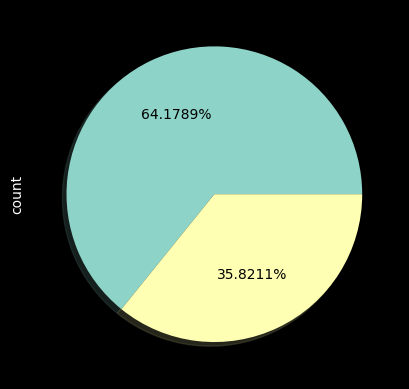

In [652]:
df['Heart Attack Risk'].value_counts().plot.pie(autopct="%1.4f%%",labels=["Risk","Not Risk"], shadow=True,textprops={'color': 'black'})

In [653]:
df['Heart Attack Risk'].value_counts()


Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [654]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,1.007874,...,5.469702,5.993690,28.891446,417.677051,3.489672,7.023508,0.358211,0.697364,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.817134,...,2.859622,3.466359,6.319181,223.748137,2.282687,1.988473,0.479502,0.459425,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,1.000000,0.001263,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,3.000000,2.998794,23.422985,225.500000,2.000000,5.000000,0.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,1.000000,...,5.000000,5.933622,28.768999,417.000000,3.000000,7.000000,0.000000,1.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,2.000000,...,8.000000,9.019124,34.324594,612.000000,5.000000,9.000000,1.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,...,10.000000,11.999313,39.997211,800.000000,7.000000,10.000000,1.000000,1.000000,180.000000,110.000000


Above we can see that our Data is not balanced, it is %64 percent to %35 percent. Therefore, we should make the data balanced. In the mean section for Heart Attack Risk, the value is 0.358211. It should be closer to 0.5 so that we can achieve the balanced data.

In [655]:
heart_attack_risk_sorted = df['Heart Attack Risk'].value_counts().sort_index()

print(heart_attack_risk_sorted)

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


* Now let's check the values for the columns with CatPlot


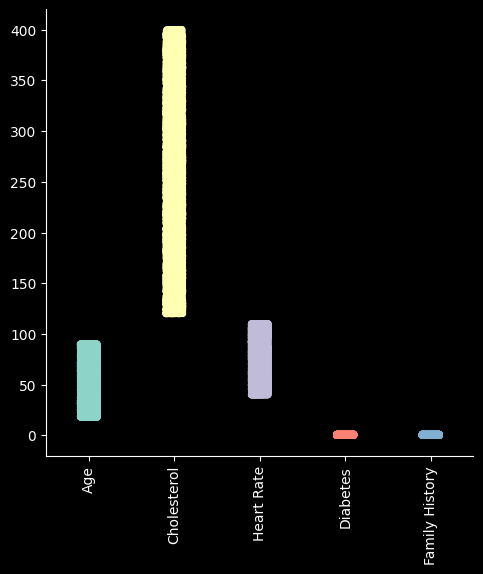

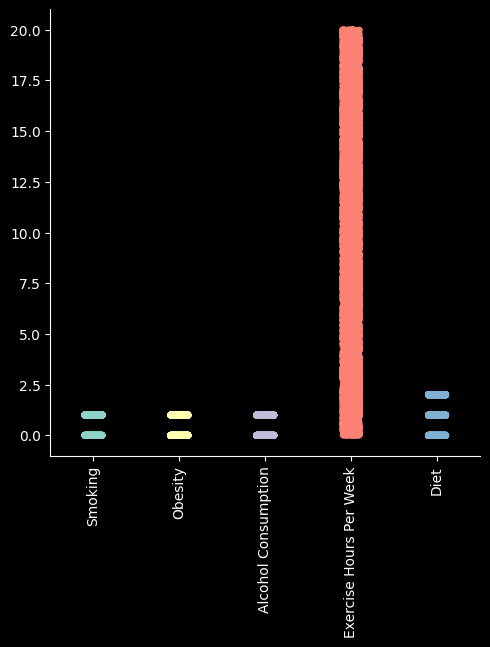

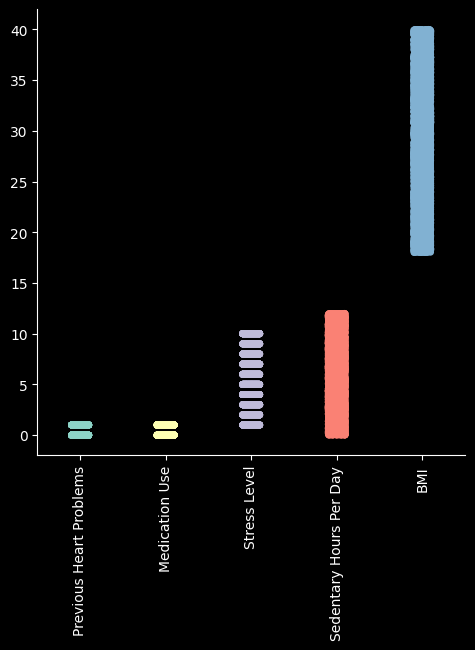

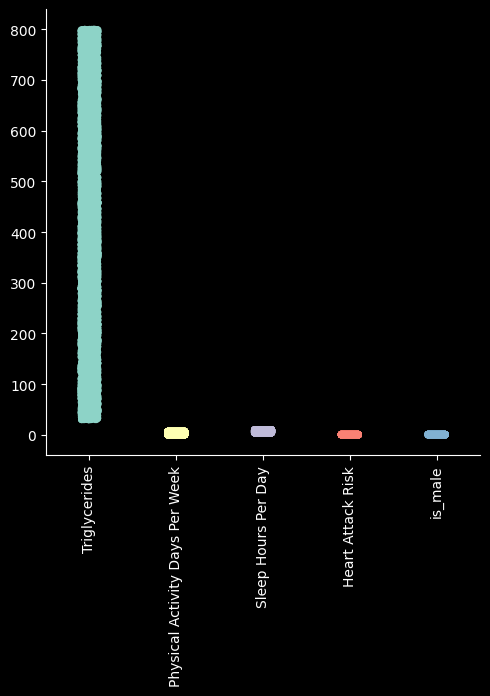

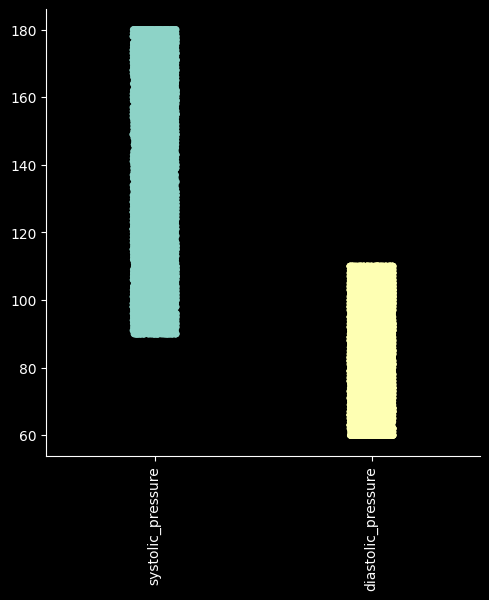

In [656]:
plots = []

plots.append(sns.catplot(data=df.iloc[:, 0:5]))
plots.append(sns.catplot(data=df.iloc[:, 5:10]))
plots.append(sns.catplot(data=df.iloc[:, 10:15]))
plots.append(sns.catplot(data=df.iloc[:, 15:20]))
plots.append(sns.catplot(data=df.iloc[:, 20:22]))


for i in range(5):
    plots[i].set_xticklabels(rotation=90)


### Inference from the CatPlot

* Above you can see the distribution of the values for each feature. For example, Previous Heart Attack Problems(1/0), Medication Use(1/0) are discrete values meaning that they represent a binary value (Yes/No). However, systolic_pressure and diastolic_pressure hold values such as 127, 128,235 etc.
* In addition to the values, we can observe that our data doesn't contain any outlier values. So we don't have to worry about them.

## Heatmap

* We have scaled the Heatmap between -0.020 and 0.020 so that we could observe the changes.

<Axes: >

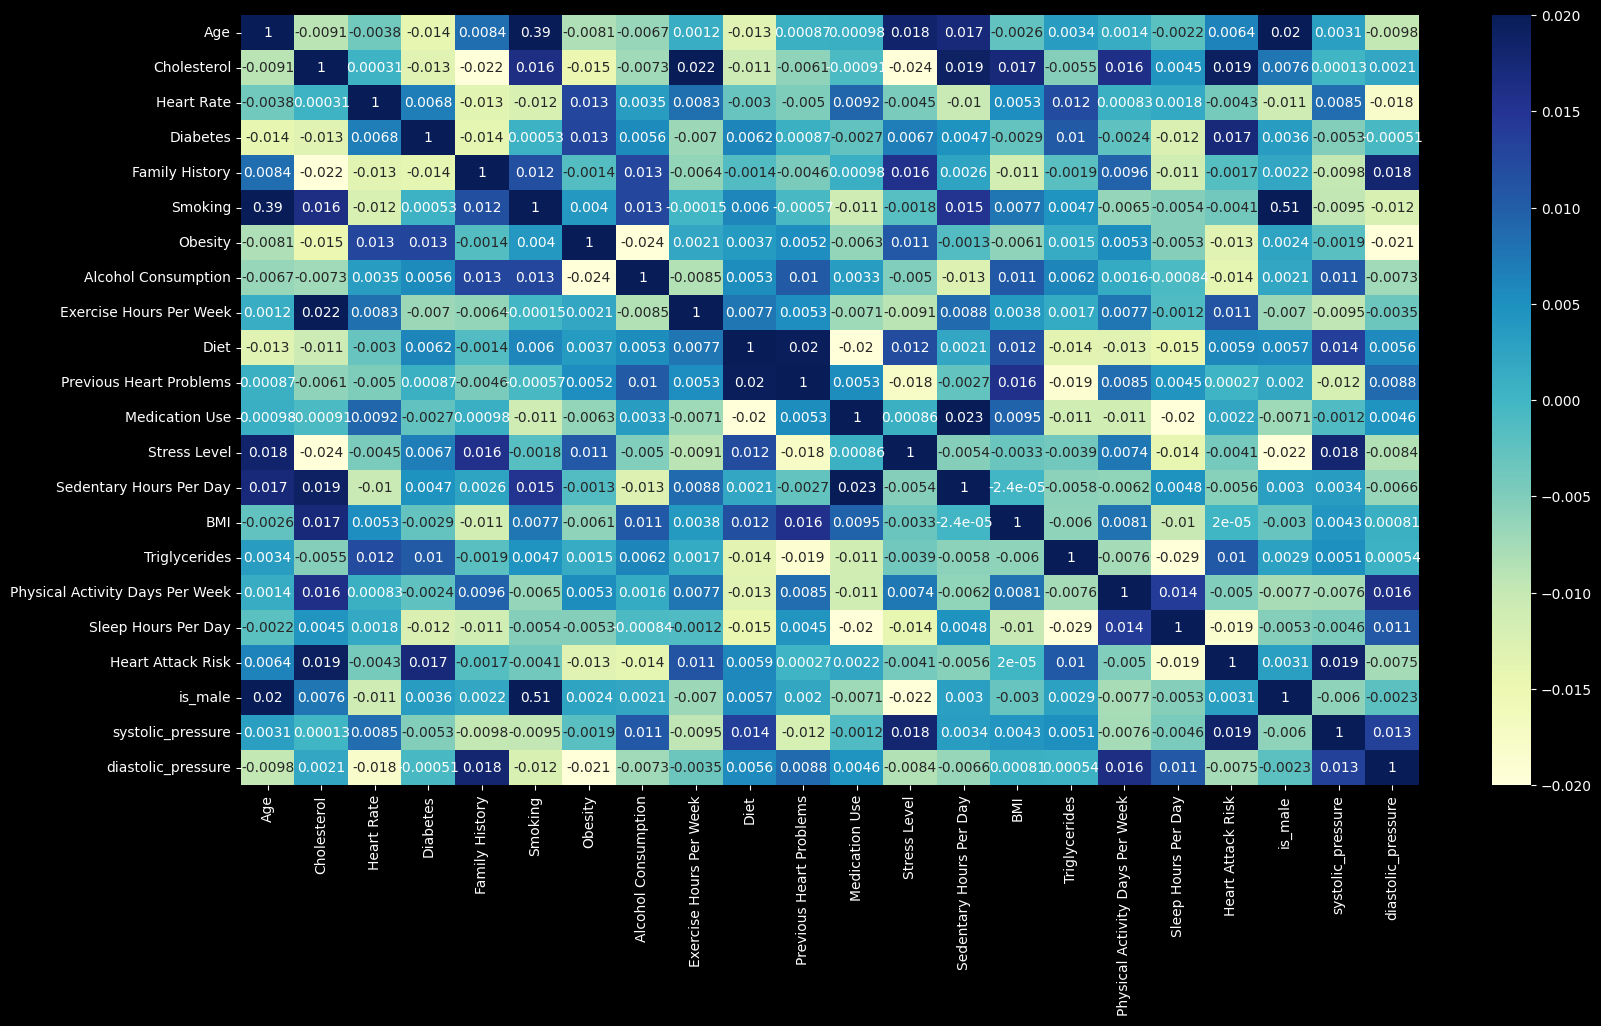

In [657]:
#HeatMap
plt.figure(figsize = (19,10))
corelation=df.corr()
sns.heatmap(corelation, cmap="YlGnBu",annot=True,vmin=-0.0200, vmax=0.0200)

From this Heatmap, we can understand that, Cholesterol, Diabetes, Exercise Hours Per Week, Triglycerides, and systolic_pressure (blood pressure) is more related with Heart Attack Risk than other features.

### Counts of features.

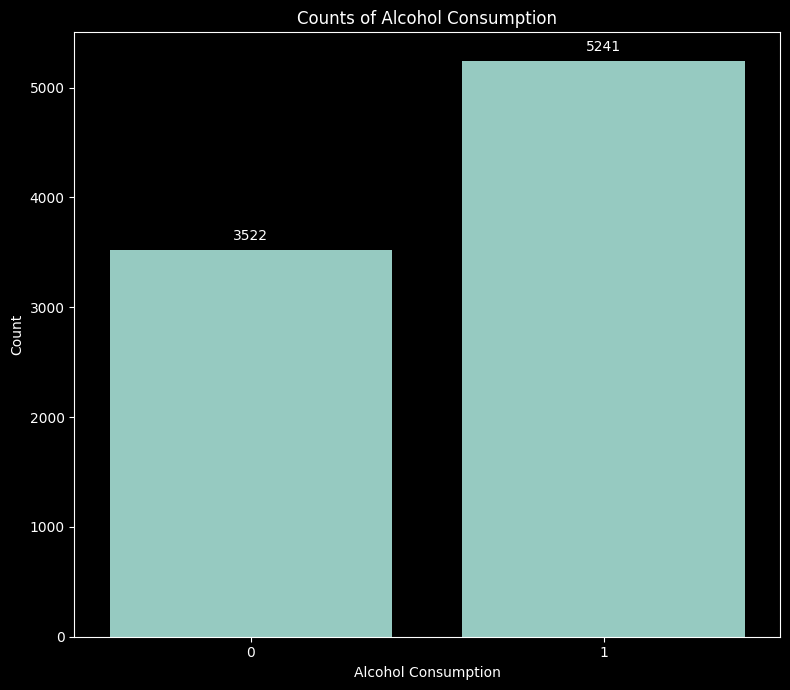

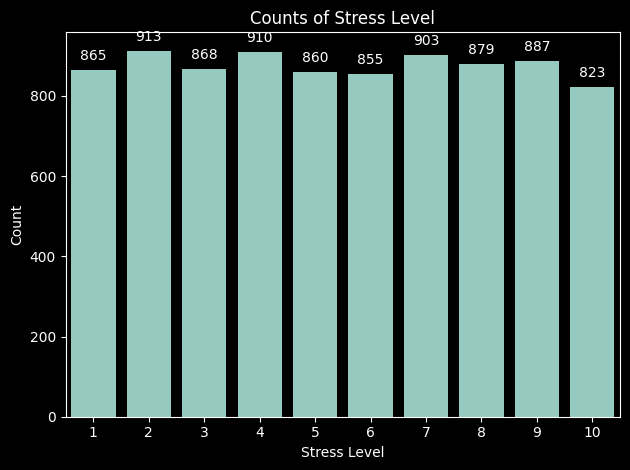

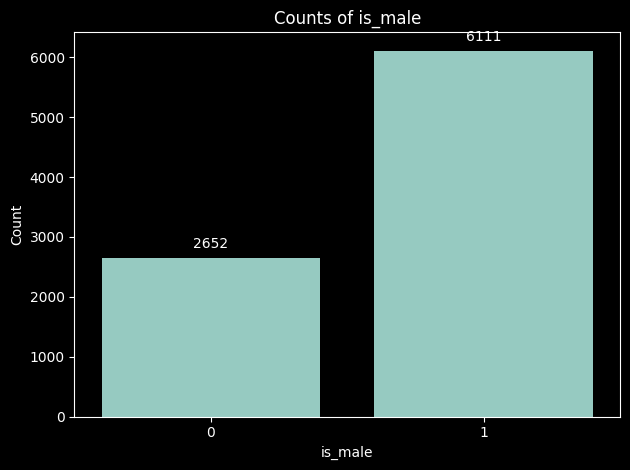

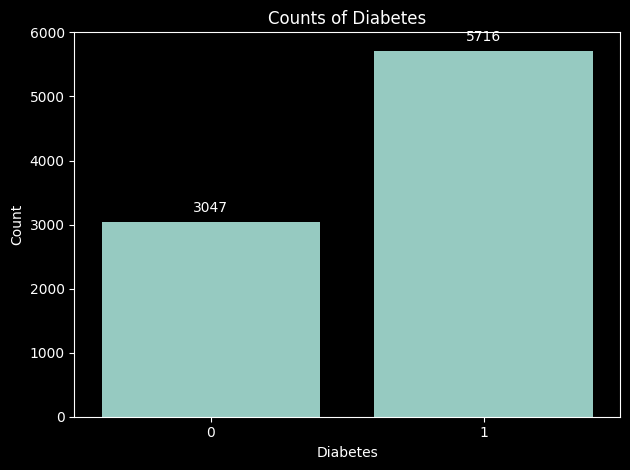

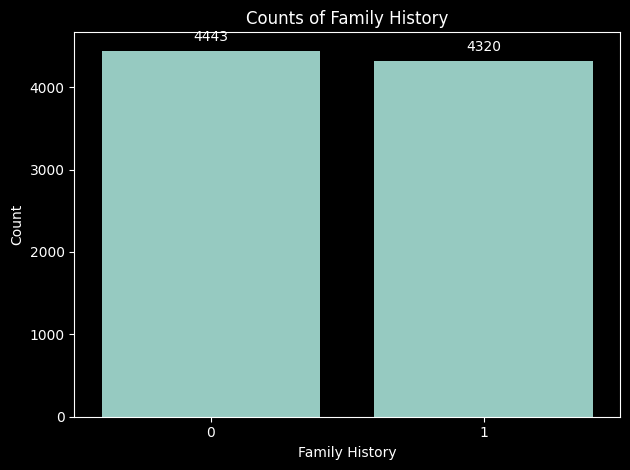

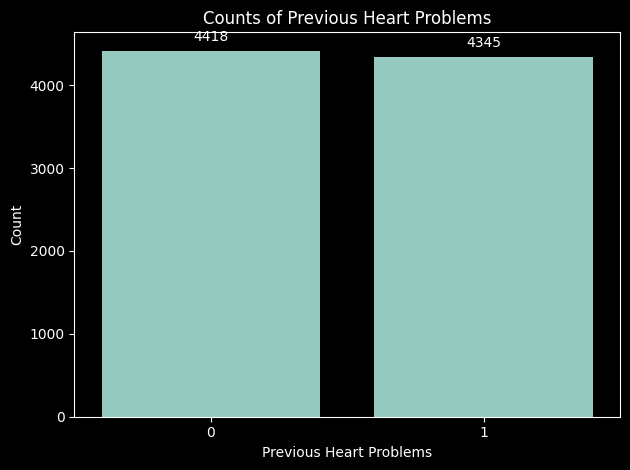

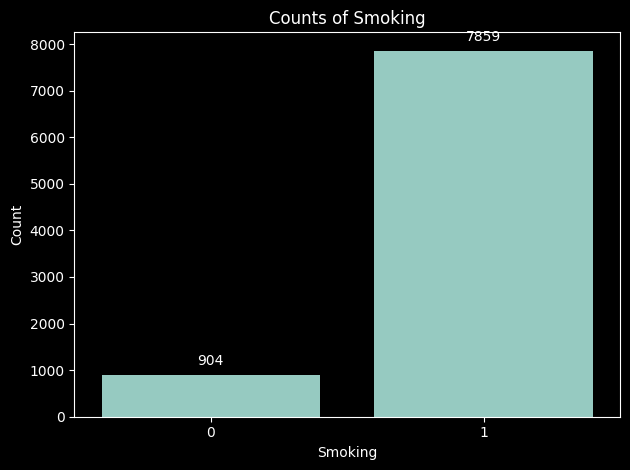

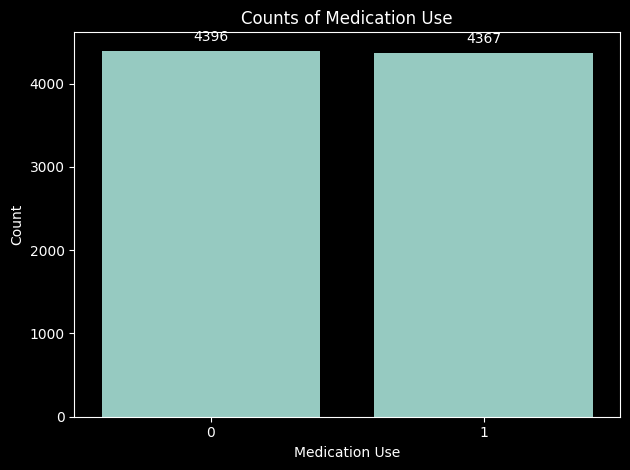

In [658]:
plt.figure(figsize=(8, 7))

plots_to_show = df[['Alcohol Consumption', 'Stress Level', 'is_male','Diabetes','Family History','Previous Heart Problems', 'Smoking','Medication Use']]

for i in plots_to_show.columns:
    ctg_num = plots_to_show[i].value_counts()
    chart = sns.barplot(x=ctg_num.index, y=ctg_num)
    
    for p in chart.patches:
        chart.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points',
                       fontsize=10)
    
    
    plt.title(f'Counts of {i}')  # Set title for each plot
    plt.xlabel(i)  # Set x-axis label based on the column name
    plt.ylabel('Count')
    plt.tight_layout()  # Adjust layout to prevent overlapping
    
    plt.show()


### Balancing The Imbalance Data

* Above it can be seen that Heart Attack Risk has a median of 0.358211 meaning that data is imbalanced and distributed as %64 to %36 percent. To fix this issue, we can use several methods. For our case we will be using Random Under sampling.

In [659]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler

random_under_sampler = RandomUnderSampler(sampling_strategy=1)

y = df['Heart Attack Risk']
X = df.drop(['Heart Attack Risk'],axis=1)

X , y = random_under_sampler.fit_resample(X,y)

scaler = MinMaxScaler()
X_min_max = pd.DataFrame(scaler.fit_transform(X))


print(pd.DataFrame(y).describe())

       Heart Attack Risk
count         6278.00000
mean             0.50000
std              0.50004
min              0.00000
25%              0.00000
50%              0.50000
75%              1.00000
max              1.00000


In [660]:
balanced_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

<Axes: ylabel='count'>

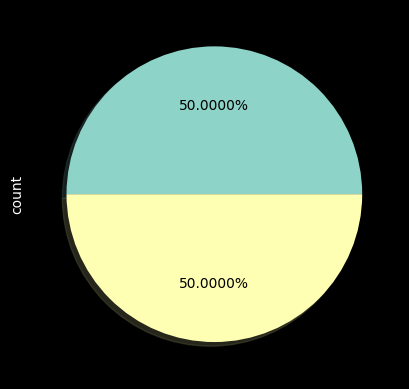

In [661]:
balanced_df['Heart Attack Risk'].value_counts().plot.pie(autopct="%1.4f%%",labels=["Risk","Not Risk"], shadow=True,textprops={'color': 'black'})


In [662]:
balanced_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,is_male,systolic_pressure,diastolic_pressure,Heart Attack Risk
count,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,...,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.00000,6278.000000,6278.000000,6278.00000
mean,53.764097,260.256292,75.162154,0.649411,0.489328,0.897738,0.499522,0.593660,10.018451,1.012424,...,5.457152,6.001994,28.875184,419.217585,3.477222,7.003823,0.69863,135.172029,85.193055,0.50000
std,21.253133,80.638989,20.608966,0.477193,0.499926,0.303017,0.500040,0.491189,5.770984,0.820037,...,2.866305,3.480173,6.291480,225.227416,2.294067,1.985446,0.45889,26.244012,14.590398,0.50004
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,1.000000,0.001529,18.002337,30.000000,0.000000,4.000000,0.00000,90.000000,60.000000,0.00000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.970609,0.000000,...,3.000000,3.005496,23.422280,224.000000,1.000000,5.000000,0.00000,113.000000,73.000000,0.00000
50%,54.000000,259.000000,76.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.077734,1.000000,...,5.000000,5.937187,28.766520,419.000000,3.000000,7.000000,1.00000,135.000000,85.000000,0.50000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.045890,2.000000,...,8.000000,9.022755,34.297869,616.000000,5.000000,9.000000,1.00000,158.000000,98.000000,1.00000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.997891,2.000000,...,10.000000,11.999313,39.997211,800.000000,7.000000,10.000000,1.00000,180.000000,110.000000,1.00000


In [663]:
balanced_df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    3139
1    3139
Name: count, dtype: int64

<Axes: >

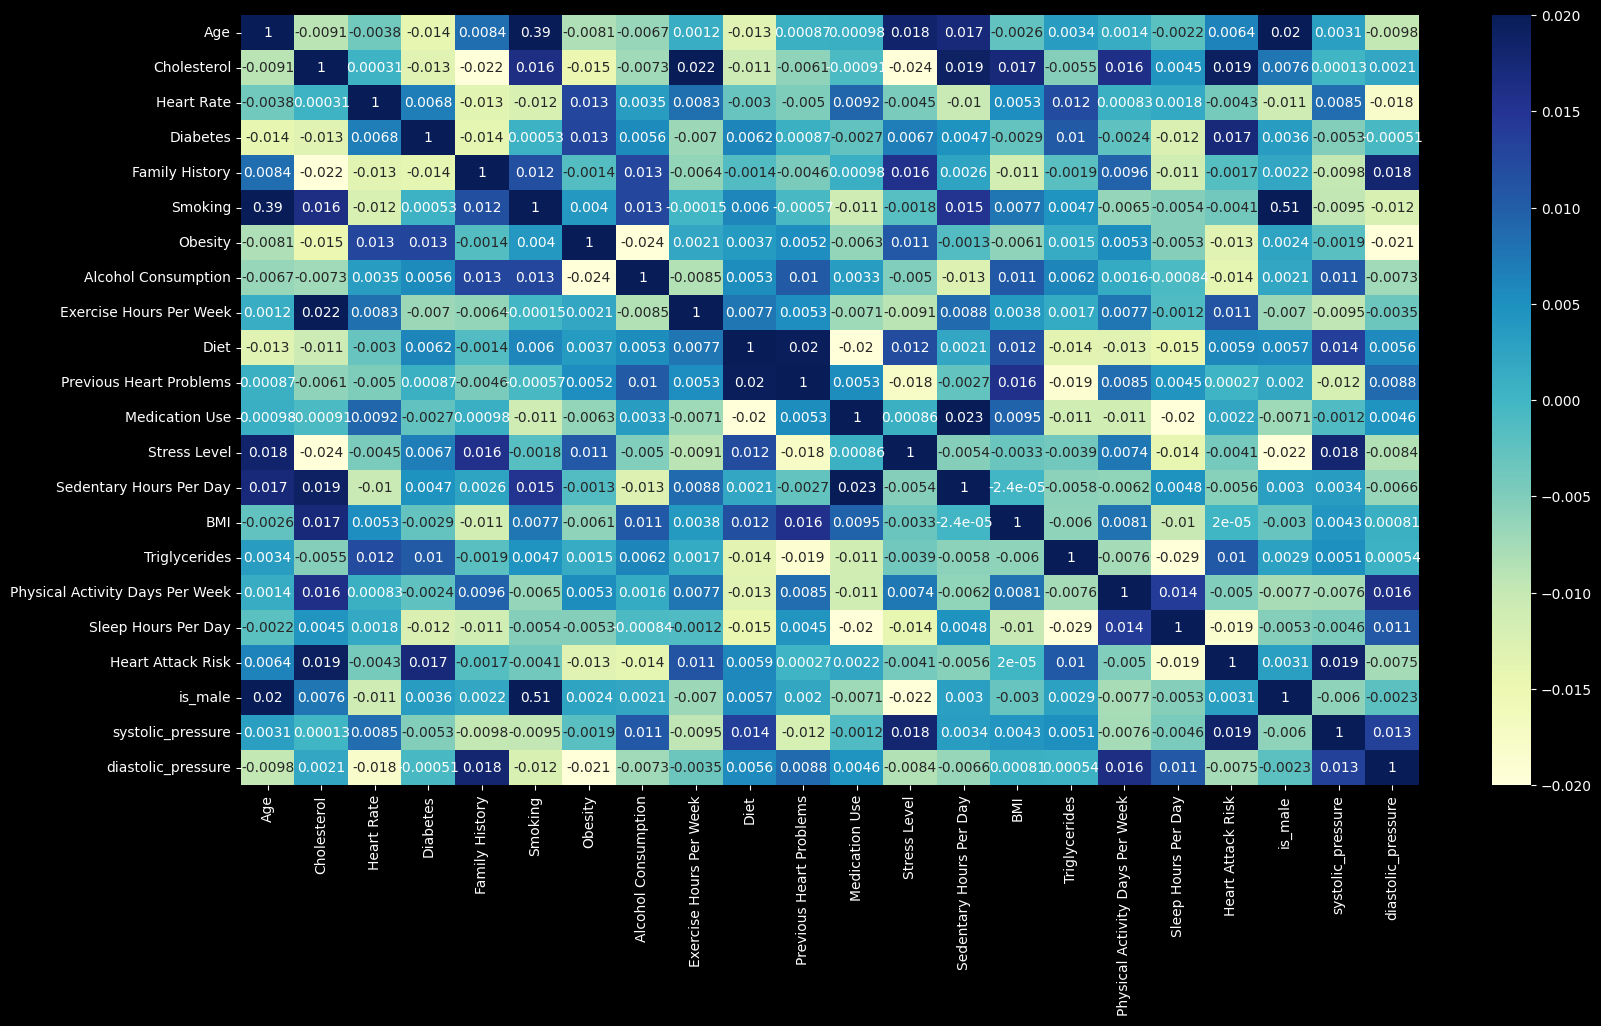

In [664]:
#HeatMap
plt.figure(figsize = (19,10))
corelation=df.corr()
sns.heatmap(corelation, cmap="YlGnBu",annot=True,vmin=-0.0200, vmax=0.0200)

Above you can see that now our data is balanced, and we used Under Sampling for that. Since we've used under sampling, Not risky was 5624, now it is the same with Risky which is 3139.

## Feature Selection

_For the feature selection there are few methods. Below you can find the list of methods for feature selection._

<ol>
    <li>Filter Methods
        <ul>
            <li>Chi-Squared Test</li>
            <li>SelectKBest</li>
            <li>Mutual Information Classification</li>
        </ul>
    </li>
    <li>Wrapper Methods
        <ul>
            <li>RFE (Recursive Feature Elimination)</li>
            <li>Forward Selection</li>
            <li>Backward Elimination</li>
        </ul>
    </li>
    <li>Embedded Methods
        <ul>
            <li>LASSO Regression</li>
            <li>Tree Based Methods
                <ul>
                    <li>Random Forest Classifier</li>
                    <li>Gradient Boost</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Principal Component Analysis (PCA)
    </li>
</ol>

1- Chi-Squared Test

In [669]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

feature_selection_methods = [
    ('chi2', chi2),  # chi2
    ('mutual_info_classif', mutual_info_classif),  # mutual_info_classif 
]

X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)


for i in range(1,20):
    for name, selection_model in feature_selection_methods:
        method = SelectKBest(selection_model, k=i)
        X_selected = method.fit_transform(X_train, y_train)
        selected_features = X.columns[method.get_support()]
        print(f"Selected Features using {name}: {selected_features}")
        print(f"Number of Features: {len(selected_features)}")
        
        RFC = RandomForestClassifier(random_state=42)
        RFC.fit(X_selected, y_train)
        
        X_test_selected = method.transform(X_test)
        y_pred = RFC.predict(X_test_selected)
        
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, RFC.predict_proba(X_test_selected)[:, 1])
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}, Accuracy: {accuracy:.4f}")
        print("-" * 50)

Selected Features using chi2: Index(['Diabetes'], dtype='object')
Number of Features: 1
Precision: 0.4881, Recall: 0.6710, F1-score: 0.5651
ROC AUC: 0.5022, Accuracy: 0.4976
--------------------------------------------------
Selected Features using mutual_info_classif: Index(['BMI'], dtype='object')
Number of Features: 1
Precision: 0.5024, Recall: 0.5188, F1-score: 0.5105
ROC AUC: 0.5218, Accuracy: 0.5159
--------------------------------------------------
Selected Features using chi2: Index(['Diabetes', 'systolic_pressure'], dtype='object')
Number of Features: 2
Precision: 0.4764, Recall: 0.4959, F1-score: 0.4860
ROC AUC: 0.4867, Accuracy: 0.4896
--------------------------------------------------
Selected Features using mutual_info_classif: Index(['BMI', 'is_male'], dtype='object')
Number of Features: 2
Precision: 0.4851, Recall: 0.5074, F1-score: 0.4960
ROC AUC: 0.5186, Accuracy: 0.4984
--------------------------------------------------
Selected Features using chi2: Index(['Diabetes',